In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/imsparsh/deam-mediaeval-dataset-emotional-analysis-in-music?select=features")

Skipping, found downloaded files in "./deam-mediaeval-dataset-emotional-analysis-in-music" (use force=True to force download)


In [ ]:
arousal_label_file = ('./deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_Annotations/annotations/annotations averaged per song/dynamic (per second annotations)/arousal.csv')
valence_label_file = ('./deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_Annotations/annotations/annotations averaged per song/dynamic (per second annotations)/valence.csv')

In [ ]:
!pip install pydub

In [ ]:
!pip install numpy pandas matplotlib tensorflow

In [ ]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load label data
annotations_arousal = pd.read_csv(arousal_label_file)
annotations_valence = pd.read_csv(valence_label_file)

In [ ]:
annotations_arousal.head()

,song_id,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,...,sample_622000ms,sample_622500ms,sample_623000ms,sample_623500ms,sample_624000ms,sample_624500ms,sample_625000ms,sample_625500ms,sample_626000ms,sample_626500ms
0,2,-0.109386,-0.114942,-0.116413,-0.118613,-0.126457,-0.133199,-0.136855,-0.144713,-0.138985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,-0.110846,-0.123973,-0.131103,-0.135956,-0.140775,-0.144664,-0.163118,-0.165218,-0.158858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0.222327,0.179446,0.178388,0.184056,0.176042,0.178720,0.176345,0.175793,0.176154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,-0.255613,-0.251579,-0.251958,-0.251124,-0.250763,-0.251957,-0.251957,-0.251957,-0.251957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,0.464234,0.460789,0.460991,0.461046,0.457240,0.465702,0.471809,0.469918,0.473377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
annotations_valence.head()

,song_id,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,...,sample_621500ms,sample_622000ms,sample_622500ms,sample_623000ms,sample_623500ms,sample_624000ms,sample_624500ms,sample_625000ms,sample_625500ms,sample_626000ms
0,2,-0.073341,-0.074661,-0.074077,-0.078154,-0.081588,-0.080873,-0.083611,-0.082145,-0.081632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,-0.189702,-0.187765,-0.183740,-0.188761,-0.193704,-0.190834,-0.189041,-0.197554,-0.202871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0.154286,0.148063,0.146956,0.151180,0.135942,0.076832,0.084487,0.088513,0.090944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0.149053,0.148260,0.147369,0.146956,0.147857,0.146927,0.145651,0.145795,0.146420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,0.342816,0.345193,0.332023,0.328887,0.327603,0.329011,0.327883,0.334822,0.328447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import os

dir_path = r"./deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/"
audio_files = []

for filename in os.listdir(dir_path):
    if filename.endswith('.mp3'):
        audio_files.append(os.path.join(dir_path, filename))


In [ ]:
from pydub import AudioSegment
import numpy as np

def load_audio_files(file_paths):
    audio_data = []
    for file in file_paths:
        audio = AudioSegment.from_mp3(file)
        samples = np.array(audio.get_array_of_samples())
        audio_data.append(samples.astype(np.float32) / 2**15)  # Normalize the samples
    return audio_data

audio_data = load_audio_files(audio_files)


In [ ]:
def generate_spectrograms(audio_data, sr=22050, n_fft=2048, hop_length=512):
    spectrograms = []
    for y in audio_data:
        S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length)
        S_DB = librosa.power_to_db(S, ref=np.max)
        spectrograms.append(S_DB)
    return spectrograms

spectrograms = generate_spectrograms(audio_data)

<ipython-input-89-bec94ec1faae>:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.14602661 0.11126709 0.11126709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length)
<ipython-input-89-bec94ec1faae>:4: FutureWarning: Pass y=[-0.00424194 -0.00616455 -0.00671387 ... -0.09136963 -0.11791992
 -0.09588623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length)
<ipython-input-89-bec94ec1faae>:4: FutureWarning: Pass y=[-0.09890747 -0.08511353 -0.14764404 ... -0.01116943 -0.00897217
 -0.00897217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length)
<ipython-input-89-bec94ec1faae>:4: FutureWarning: Pass y=[-

In [ ]:
def align_spectrograms_with_annotations(spectrograms, annotations, interval=500):
    aligned_data = []
    for i, S_DB in enumerate(spectrograms):
        num_frames = S_DB.shape[1]
        num_intervals = int(num_frames * interval / 1000)
        annotation = annotations.iloc[i]
        # Resample annotation to match the number of spectrogram frames
        annotation_resampled = np.interp(
            np.linspace(0, len(annotation)-1, num_intervals),
            np.arange(len(annotation)),
            annotation
        )
        aligned_data.append((S_DB.T, annotation_resampled))
    return aligned_data

aligned_data_arousal = align_spectrograms_with_annotations(spectrograms, annotations_arousal)
aligned_data_valence = align_spectrograms_with_annotations(spectrograms, annotations_valence)


In [ ]:
def align_spectrograms_with_annotations(spectrograms, annotations, interval=500):
    aligned_data = []
    for i, S_DB in enumerate(spectrograms):
        num_frames = S_DB.shape[1]
        annotation = annotations.iloc[i]
        annotation = annotations.iloc[i].fillna(0)
        num_intervals = len(annotation)

        # Ensure that the number of intervals matches the number of frames
        if num_frames != num_intervals:
            # Resample the annotations to match the number of spectrogram frames
            annotation_resampled = np.interp(
                np.linspace(0, num_intervals - 1, num_frames),
                np.arange(num_intervals),
                annotation
            )
        else:
            annotation_resampled = annotation

        aligned_data.append((S_DB.T, annotation_resampled))
    return aligned_data

aligned_data_arousal = align_spectrograms_with_annotations(spectrograms, annotations_arousal)
aligned_data_valence = align_spectrograms_with_annotations(spectrograms, annotations_valence)


In [ ]:
aligned_data = [(x, y1, y2) for (x, y1), (_, y2) in zip(aligned_data_arousal, aligned_data_valence)]

# Prepare X and y for model input
X = []
y_arousal = []
y_valence = []
for x, y1, y2 in aligned_data:
  X.append(x)
  y_arousal.append(y1)
  y_valence.append(y2)


In [ ]:
min_Xrows = min(x.shape[0] for x in X)
min_Xcols = min(x.shape[1] for x in X)
min_yarousal_rows = min(y.shape[0] for y in y_arousal)
min_yvalence_rows = min(y.shape[0] for y in y_valence)


# Clip each array to the minimum shape
X = [x[:min_Xrows, :min_Xcols] for x in X]
y_arousal = [y[:min_yarousal_rows] for y in y_arousal]
y_valence = [y[:min_yvalence_rows] for y in y_valence]

In [ ]:
count = 0
index = 0
for x in X:
  if(x.shape[0]!=min_Xrows):
    X.pop(index)
    count +=1
  index+=1
print(count)

901


In [ ]:
count = 0
index = 0
for y in y_arousal:
  if(y.shape[0]!=min_yarousal_rows):
    y_arousal.pop(index)
    count +=1
  index+=1
print(count)

0


In [ ]:
count = 0
index = 0
for y in y_valence:
  if(y.shape[0]!=min_yvalence_rows):
    y_valence.pop(index)
    count +=1
  index+=1
print(count)

0


In [ ]:
X = np.array(X)
y_arousal = np.array(y_arousal)
y_valence = np.array(y_valence)

# Scale the data
scaler = MinMaxScaler()
X_scaled = np.array([scaler.fit_transform(x) for x in X])

# Split into training and testing sets
X_train, X_test, y_train_arousal, y_test_arousal, y_train_valence, y_test_valence = train_test_split(
    X_scaled, y_arousal, y_valence, test_size=0.2, random_state=42
)

In [ ]:
import numpy as np
import tensorflow as tf
from transformers import TFBertModel, BertConfig, BertTokenizer
from sklearn.model_selection import train_test_split

In [ ]:
class TransformerForRegression(tf.keras.Model):
    def _init_(self, model_name='bert-base-uncased'):
        super(TransformerForRegression, self)._init_()
        self.transformer = TFBertModel.from_pretrained(model_name)
        self.dense = tf.keras.layers.Dense(1, activation='linear')

    def call(self, inputs):
        outputs = self.transformer(inputs)[0] 
        return self.dense(outputs)

transformer_model = TransformerForRegression()
transformer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                          loss='mean_squared_error',
                          metrics=['mean_absolute_error'])

X_train_tensor = tf.convert_to_tensor(X_train)
y_train_tensor = tf.convert_to_tensor(y_train)
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test)

history = transformer_model.fit(X_train_tensor, y_train_tensor, epochs=5, batch_size=8, validation_split=0.2)

test_loss, test_mae = transformer_model.evaluate(X_test_tensor, y_test_tensor)
# print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

Epoch 1/1000
36/36 [==============================] - 10s 210ms/step - loss: 1513.6290 - mae: 1.7461 - val_loss: 1707.7422 - val_mae: 1.8255
Epoch 2/1000
36/36 [==============================] - 6s 177ms/step - loss: 1498.9626 - mae: 1.7299 - val_loss: 1695.0752 - val_mae: 1.8609
Epoch 3/1000
36/36 [==============================] - 6s 177ms/step - loss: 1488.8016 - mae: 1.7176 - val_loss: 1684.9429 - val_mae: 1.8727
Epoch 4/1000
36/36 [==============================] - 6s 177ms/step - loss: 1479.5615 - mae: 1.7000 - val_loss: 1675.1442 - val_mae: 1.8192
Epoch 5/1000
36/36 [==============================] - 6s 178ms/step - loss: 1470.8335 - mae: 1.6853 - val_loss: 1665.9991 - val_mae: 1.7986
Epoch 6/1000
36/36 [==============================] - 6s 177ms/step - loss: 1462.1957 - mae: 1.6788 - val_loss: 1657.2437 - val_mae: 1.8101
Epoch 7/1000
36/36 [==============================] - 6s 177ms/step - loss: 1454.3607 - mae: 1.6880 - val_loss: 1649.0242 - val_mae: 1.7844
Epoch 8/1000
36/36 

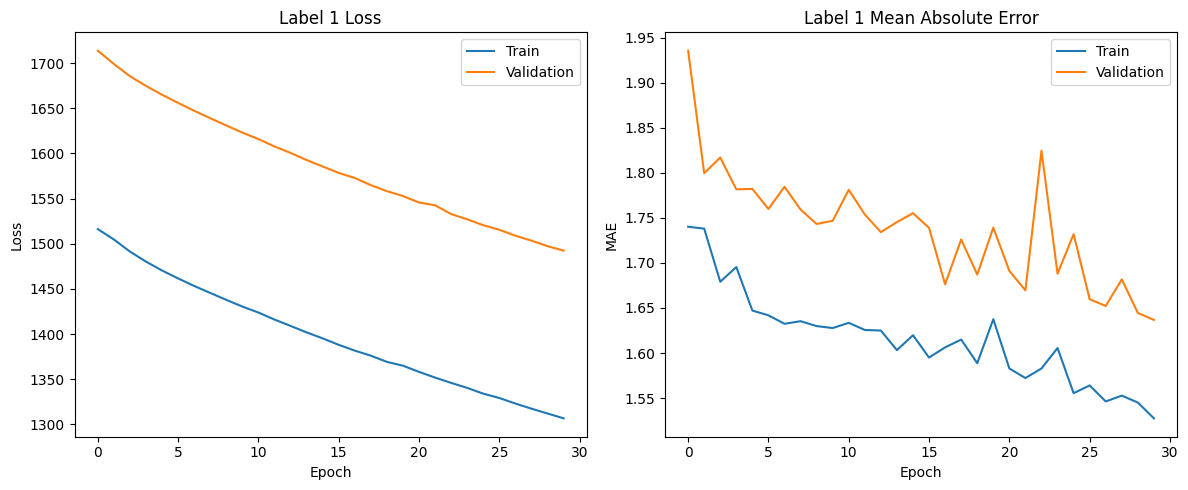

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    # Plot loss
    plt.figure(figsize=(12, 5))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation MAE values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title(f'{title} Mean Absolute Error')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

# Plot history for label 1
plot_history(history_arousal, "Arousal")

# Plot history for label 2
plot_history(history_valence, "Valence")


In [ ]:
# Evaluate the model on test set
loss_arousal, mae_arousal = model_arousal.evaluate(X_test, y_test_arousal)
loss_valence, mae_valence = model_valence.evaluate(X_test, y_test_valence)

print(f'Label 1 - Test Loss: {loss_arousal}, Test MAE: {mae_arousal}')
print(f'Label 2 - Test Loss: {loss_valence}, Test MAE: {mae_valence}')


In [ ]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        return x + self.encoding[:, :x.size(1), :].to(x.device)

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0
        self.d_k = d_model // num_heads
        self.num_heads = num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out = nn.Linear(d_model, d_model)
        self.attention = None

    def forward(self, q, k, v, mask=None):
        batch_size = q.size(0)
        q = self.q_linear(q).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        k = self.k_linear(k).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        v = self.v_linear(v).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)

        scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        self.attention = torch.softmax(scores, dim=-1)
        context = torch.matmul(self.attention, v).transpose(1, 2).contiguous().view(batch_size, -1, self.d_k * self.num_heads)
        return self.out(context)

class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(FeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(d_ff, d_model)

    def forward(self, x):
        return self.linear2(self.dropout(torch.relu(self.linear1(x))))

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = FeedForward(d_model, d_ff, dropout)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        attn_out = self.attention(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_out))
        ff_out = self.ff(x)
        x = self.norm2(x + self.dropout(ff_out))
        return x

class Transformer(nn.Module):
    def __init__(self, input_dim, d_model, num_heads, num_layers, d_ff, output_dim, max_len=5000, dropout=0.1):
        super(Transformer, self).__init__()
        self.embedding = nn.Embedding(input_dim, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_len)
        self.layers = nn.ModuleList([
            TransformerBlock(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)
        ])
        self.fc_out = nn.Linear(d_model, output_dim)

    def forward(self, x, mask=None):
        x = self.embedding(x)
        x = self.positional_encoding(x)
        for layer in self.layers:
            x = layer(x, mask)
        return self.fc_out(x)


input_dim = 10000  
d_model = 512  
num_heads = 8  
num_layers = 6  
d_ff = 2048  
output_dim = 10000  
max_len = 5000  

model = Transformer(input_dim, d_model, num_heads, num_layers, d_ff, output_dim, max_len)

# Dummy input (batch_size, sequence_length)
x = torch.randint(0, input_dim, (32, 100))
output = model(x)
print(output.shape)  # Should output (batch_size, sequence_length, output_dim)
